<a href="https://colab.research.google.com/github/AbhayMudgal/BTP/blob/main/BTP_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random


%matplotlib inline 
plt.rcParams["figure.figsize"] = (10,10)


In [2]:
def B(delE):
  # Meteropolis function for the solute atoms
  deE = -delE * 200
  if deE > 1:
    deE = 1
  U = math.exp(deE)
  if dE < -5:
    U = 0
  return min(U, 1)

def E( X, Y, W, H):
  # Energy function for the solute atoms
  pi = np.pi
  ans = 0
  for i in range(-4, 5):
    ans += ( np.sin(2*pi*Y) / ( np.cosh(2*pi*(X - (i*W/H))) - np.cos(2* pi *Y)))
  
  return ans

def En(sig, mul):
  # Energy function for the dislocation
  E_prime = sig*mul
  return E_prime

def Bn(delE):
  # Meteropolis function for the dislocation
  deE = delE
  if deE > 1:
    deE = 1
  U = math.exp(deE)
  if deE < -5:
    U = 0
  return min(U, 1)


def randomize(array, loc_set, sol_loc):


In [6]:
#Code for testing dislocation motion algorithm as described in the paper.

W = int (input("Enter Width of the simulation cell: "))
H = int (input("Enter Height of the simulation cell: "))
iter = int (input("Enter number of iterations: "))
mul = float (input("Enter Multiplier for external stress in Meteropolis Function: "))

cum = []
sig = 0.001

x = []
while sig<=0.04:
  array = np.zeros((W, H), int)
  x_dis = int (W/2)
  y_dis = int (H/2)

  array[x_dis][y_dis] = -1


  vel = []
  k = 0
  i = 0
  for i in range(iter):
    U = random.randint(0, 1)
    
    if U == 0:
      dE = -En(sig, mul)
      x_dis_new = (x_dis - 1) % W
    
    else:
      dE = En(sig, mul)  
      x_dis_new = (x_dis + 1) % W

    bd = Bn(dE)
    n = random.random()
    
    if n<bd:
      array[x_dis][y_dis] = 0
      x_dis = x_dis_new
      array[x_dis][y_dis] = -1
      k = k + (2*U - 1)
    
    if i%10000 == 0:
      vel.append(k)
  
  x.append(sig)
  sig += 0.001
  cum.append(vel)    

y = []
for row in cum:
  sum = row[0]
  for i in range(len(row) - 1):
     sum += row[i+1] - row[i] 
  sum = sum / len(row)
  y.append(sum/10000)

plt.plot(x, y)
plt.xlabel("External Stress")
plt.ylabel("Velocity of Dislocation")

In [ ]:
#entering parameters and calculating the number of solute atoms.
conc = float (input("Enter percentage concentration of solute: "))
Mr = float (input("Enter mobility ratio: "))
sig = float (input("Enter external stress as a function of G: "))
mul = float (input("Enter Multiplier for external stress in Meteropolis Function: ")) #(100 or 50)

Enter percentage concentration of solute: 1
Enter mobility ratio: 0.09
Enter external stress as a function of G: .03
Enter Multiplier for external stress in Meteropolis Function: 100


In [ ]:
W = int (input("Enter Width of the simulation cell: "))
H = int (input("Enter Height of the simulation cell: "))

Enter Width of the simulation cell: 100
Enter Height of the simulation cell: 100


In [ ]:
#initializing array  and randomly distributing solutes in the matrix

array = np.zeros((W, H), int)

sol_loc = []
loc_set = set()
sol = (H*W*conc)/100
a = 0
R = sol*Mr

while (a < sol):
  for i in range(W):
    for j in range(H):
      num = random.randint(0, 100)
      
      if (num==100) and (array[i][j] == 0):
        array[i][j] = 1
        sol_loc.append([i, j])
        loc_set.add((i, j))
        a = a+1    
      
      if (a==sol): 
        break
    
    if (a==sol): 
      break 

x_dis = int (W/2)
y_dis = int (H/2)


array[x_dis][y_dis] = -1
loc_set.add((x_dis, y_dis))

In [ ]:
#projecting the array as image
plt.grid(False)
plt.axis('off')
image = plt.imshow(array, interpolation='nearest')
plt.show()

In [ ]:
# The main simulation algorithm. It calculates the parameters and then chooses whether 
# we move the dislocation or the a solute atom. 

iter = int (input("Enter Number of Iterations: "))
vel = []
speed = 0
for i in range (0, iter):
  
  if i%1000 == 0:
    vel.append(speed)

  n = random.randint(0, R)
  
  if n == 0:
    
    k = random.randint(0, 1)
    if k == 0:
      dE = -En(sig, mul)
      x_dis_new = (x_dis - 1) % W
    
    else:
      dE = En(sig, mul)  
      x_dis_new = (x_dis + 1) % W

    bd = Bn(dE)
    n = random.random()
    
    if n < bd:
      if (x_dis_new, y_dis) not in loc_set:
        loc_set.remove((x_dis, y_dis))
        loc_set.add((x_dis_new, y_dis))
        array[x_dis][y_dis] = 0
        array[x_dis_new][y_dis] = -1
      else:  
        sol_loc.remove([x_dis_new, y_dis])
        sol_loc.append([x_dis, y_dis])
        array[x_dis][y_dis] = 1
        array[x_dis_new][y_dis] = -1

      x_dis = x_dis_new
      speed = speed + (2*k - 1)
    
    if x_dis==0:
      randomize(array, loc_set, sol_loc) 

  else:
    n = random.randint(0, sol-1)
    x = sol_loc[n][0]
    y = sol_loc[n][1]
  
    for i in range(4):
      xi = x
      yi = y
    
      if (i==0):
        xi = (x - 1) % W
      elif (i==1):
        yi = (y - 1) % H
      elif (i==2):
        xi = (x + 1) % W
      else:
        yi = (y + 1) % H
      
      if ((xi, yi) not in loc_set):
        
        X = (x - x_dis) / W
        Y = (y - y_dis) / H
        Xi = (xi - x_dis) / W
        Yi = (yi - y_dis) / H
        

        delE = E(Xi, Yi, W, H) - E(X, Y, W, H)
        n = random.random()
        b = B(delE)

        if n < b:
          m = random.random()
          if delE*200 < 0 or m>0.8:
            array[x][y] = 0
            array[xi][yi] = 1

            loc_set.remove((x, y))
            loc_set.add((xi, yi))
            sol_loc.append([xi, yi])
            sol_loc.remove([x, y])
            
            break



Enter Number of Iterations: 10000


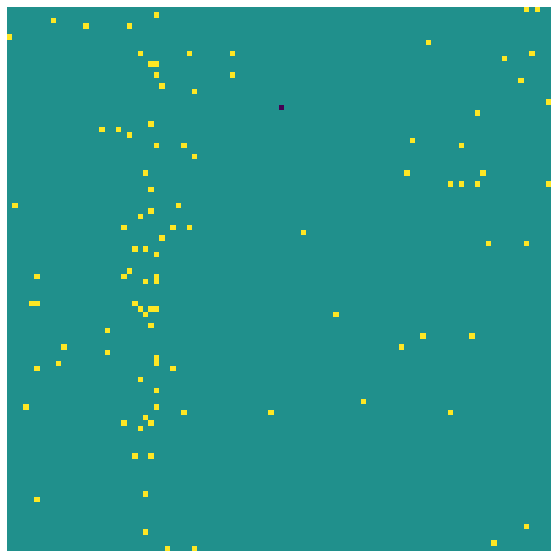

In [ ]:
#plotting image
plt.grid(False)
plt.axis('off')
image = plt.imshow(array, interpolation='nearest')
plt.show()

Text(0, 0.5, 'Velocity of Dislocation')

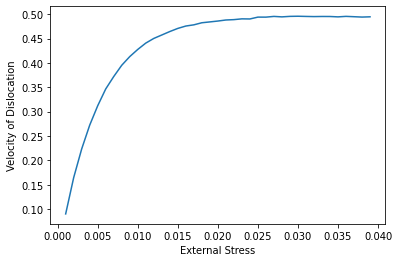